 Accuracy: 0.7388535031847133

 Confusion Matrix:
 [[142  33]
 [ 49  90]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78       175
           1       0.73      0.65      0.69       139

    accuracy                           0.74       314
   macro avg       0.74      0.73      0.73       314
weighted avg       0.74      0.74      0.74       314



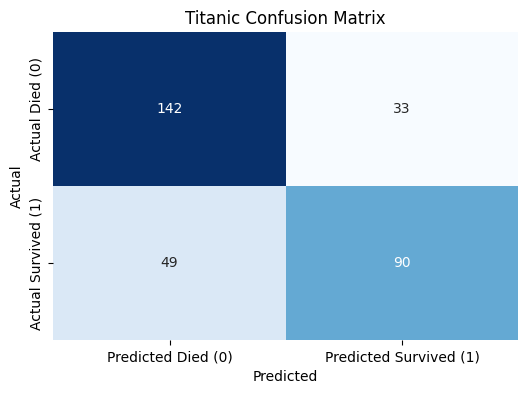

In [11]:
# STEP 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# STEP 2 (OPTIONAL): Upload file in Colab
# from google.colab import files
# files.upload()

# STEP 3: Load the Titanic CSV file (update filename if needed)
df = pd.read_csv("Titanic Dataset.csv")

# STEP 4: Normalize column names (lowercase & remove extra spaces)
df.columns = df.columns.str.lower().str.strip()

# STEP 5: Select and clean relevant columns
df = df[["survived", "pclass", "sex", "age", "fare"]]
df = df.dropna()  # Remove rows with missing values

# STEP 6: Encode 'sex' column (male=1, female=0)
label_encoder = LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])

# STEP 7: Define features and target
X = df[["pclass", "sex", "age", "fare"]]
y = df["survived"]

# STEP 8: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# STEP 9: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# STEP 10: Predict and evaluate
y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# STEP 11: Visualize the Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Option 1: Basic heatmap using seaborn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Predicted Died (0)", "Predicted Survived (1)"],
            yticklabels=["Actual Died (0)", "Actual Survived (1)"])
plt.title("Titanic Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()




In [10]:
# STEP 12: Predict using user input
print("\nEnter passenger details to predict survival:")

# User input
pclass = int(input("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd): "))
sex_input = input("Sex (male/female): ").strip().lower()
sex = 1 if sex_input == 'male' else 0
age = float(input("Age (e.g., 29.0): "))
fare = float(input("Fare (e.g., 72.5): "))

# Create DataFrame from input
user_data = pd.DataFrame([[pclass, sex, age, fare]],
                         columns=["pclass", "sex", "age", "fare"])

# Predict
prediction = model.predict(user_data)[0]

# Output result
result = "Survived ✅" if prediction == 1 else "Did NOT Survive ❌"
print(f"\nPrediction: {result}")



Enter passenger details to predict survival:
Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd): 3
Sex (male/female): female
Age (e.g., 29.0): 28
Fare (e.g., 72.5): 7.25

Prediction: Survived ✅
